In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train[0]

5

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
x_train.shape

(60000, 28, 28)

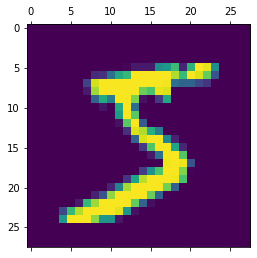

In [11]:
plt.matshow(x_train[0])

In [12]:
x_train = x_train/ 255
x_test = x_test/ 255

In [13]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [14]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8750
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9263


In [25]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9241


[0.2700607478618622, 0.9240999817848206]

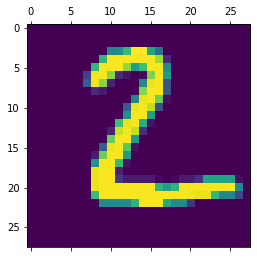

In [34]:
plt.matshow(x_test[1])

In [35]:
y_predict = model.predict(x_test_flattened)
y_predict[1]

313/313 [==============================] - 1s 2ms/step


array([2.3368415e-01, 5.7537341e-03, 9.9907535e-01, 2.5052306e-01,
       3.0033959e-10, 8.0994749e-01, 9.1682452e-01, 1.2167783e-12,
       1.4339601e-01, 2.1505659e-09], dtype=float32)

In [36]:
np.argmax(y_predict[1])

2

In [37]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    1,    2,    0,    7,   14,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,   11,  919,   16,    6,    5,   14,   11,   43,    4],
       [   2,    0,   18,  905,    0,   34,    5,   12,   25,    9],
       [   1,    1,    2,    1,  892,    0,   19,    4,   10,   52],
       [   7,    3,    2,   23,    9,  778,   21,    8,   32,    9],
       [   7,    3,    5,    1,    6,    8,  925,    2,    1,    0],
       [   1,    5,   22,    6,    4,    0,    0,  953,    3,   34],
       [   4,    9,    6,   17,    8,   24,   11,   14,  872,    9],
       [   7,    7,    2,    7,   17,    5,    0,   21,    9,  934]])>

In [43]:
import seaborn as sn

Text(69.0, 0.5, 'true value')

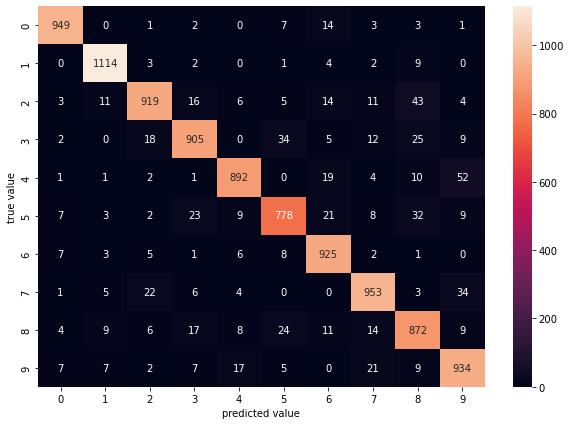

In [45]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9841


In [48]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9753


[0.07871031761169434, 0.9753000140190125]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'true value')

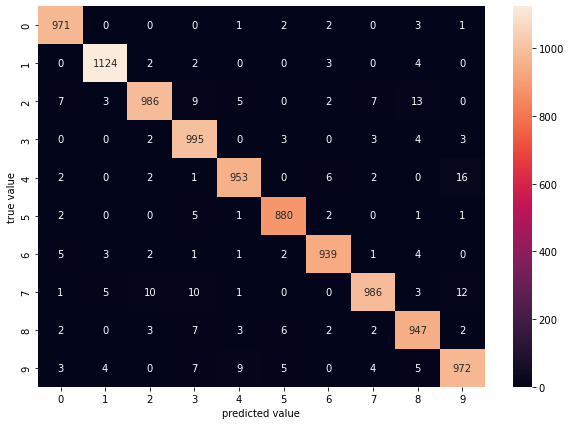

In [49]:
y_predict = model.predict(x_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')